In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import mlflow
import mlflow.sklearn

In [9]:
# Load the dataset
df = pd.read_csv("reg2.csv")
print(df.head())

          y        x1        x2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0  8.288461  4.228557  0.019050         NaN    0.108844    -0.91078   
1  5.758541  2.160739  1.478341         NaN         NaN         NaN   
2  5.679527  4.903774 -4.166727         NaN         NaN         NaN   
3  6.274630  5.429680 -4.855443         NaN         NaN         NaN   
4  7.281397  5.206820 -3.307489         NaN         NaN         NaN   

   Unnamed: 6  
0    0.299667  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


In [10]:
# Train-test split
X1 = df[['x1']]
X2 = df[['x2']]
X12 = df[['x1', 'x2']]
y = df['y']

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
X2_train, X2_test, _, _ = train_test_split(X2, y, test_size=0.2, random_state=42)
X12_train, X12_test, _, _ = train_test_split(X12, y, test_size=0.2, random_state=42)

In [13]:
# ✅ Set tracking URI to your MLflow server
mlflow.set_tracking_uri("http://127.0.0.1:8080")

# ✅ Create experiment if not exists, else fetch it
experiment_name = "reg2_experiment"
exp = mlflow.get_experiment_by_name(experiment_name)

if exp is None:
    exp_id = mlflow.create_experiment(experiment_name)
else:
    exp_id = exp.experiment_id

mlflow.set_experiment(experiment_name)

<Experiment: artifact_location='mlflow-artifacts:/160149132565775066', creation_time=1758981885457, experiment_id='160149132565775066', last_update_time=1758981885457, lifecycle_stage='active', name='reg2_experiment', tags={}>

In [14]:
 # Model 1: Linear regression with x1
with mlflow.start_run(run_name="model_1"):
    model1 = LinearRegression()
    model1.fit(X1_train, y_train)
    y_pred1 = model1.predict(X1_test)

    mse1 = mean_squared_error(y_test, y_pred1)
    r21 = r2_score(y_test, y_pred1)

    print("Model 1 (x1 only) -> MSE:", mse1, "R2:", r21)

    mlflow.log_param("features", "x1")
    mlflow.log_metric("mse", mse1)
    mlflow.log_metric("r2", r21)
    mlflow.sklearn.log_model(model1, "model", registered_model_name="model_1")


2025/09/27 10:04:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Model 1 (x1 only) -> MSE: 1.2475525347335041 R2: -0.019791819551186807


2025/09/27 10:04:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'model_1'.
2025/09/27 10:04:57 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model_1, version 1
Created version '1' of model 'model_1'.


🏃 View run model_1 at: http://127.0.0.1:8080/#/experiments/160149132565775066/runs/c38d0b7dd9c949329efa1769d4ff2986
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/160149132565775066


In [16]:
# Model 2: Linear regression with x2
with mlflow.start_run(run_name="model_2"):
    model2 = LinearRegression()
    model2.fit(X2_train, y_train)
    y_pred2 = model2.predict(X2_test)

    mse2 = mean_squared_error(y_test, y_pred2)
    r22 = r2_score(y_test, y_pred2)

    print("Model 2 (x2 only) -> MSE:", mse2, "R2:", r22)

    mlflow.log_param("features", "x2")
    mlflow.log_metric("mse", mse2)
    mlflow.log_metric("r2", r22)
    mlflow.sklearn.log_model(model2, "model", registered_model_name="model_2")


2025/09/27 10:07:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Model 2 (x2 only) -> MSE: 1.3742026554129763 R2: -0.12331993032664679


2025/09/27 10:07:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'model_2'.
2025/09/27 10:07:29 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model_2, version 1
Created version '1' of model 'model_2'.


🏃 View run model_2 at: http://127.0.0.1:8080/#/experiments/160149132565775066/runs/9b423809e6374a169126fce6e9b3cd3e
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/160149132565775066


In [15]:
# Model 3: Linear regression with x1 + x2
with mlflow.start_run(run_name="model_3"):
    model3 = LinearRegression()
    model3.fit(X12_train, y_train)
    y_pred3 = model3.predict(X12_test)

    mse3 = mean_squared_error(y_test, y_pred3)
    r23 = r2_score(y_test, y_pred3)

    print("Model 3 (x1+x2) -> MSE:", mse3, "R2:", r23)

    mlflow.log_param("features", "x1+x2")
    mlflow.log_metric("mse", mse3)
    mlflow.log_metric("r2", r23)
    mlflow.sklearn.log_model(model3, "model", registered_model_name="model_3")


Model 3 (x1+x2) -> MSE: 0.060476919470743615 R2: 0.9505641117060496


2025/09/27 10:07:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/27 10:07:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'model_3'.
2025/09/27 10:07:21 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model_3, version 1
Created version '1' of model 'model_3'.


🏃 View run model_3 at: http://127.0.0.1:8080/#/experiments/160149132565775066/runs/bfad75f32e554bc9b6b9aa344c313478
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/160149132565775066


##### Observation

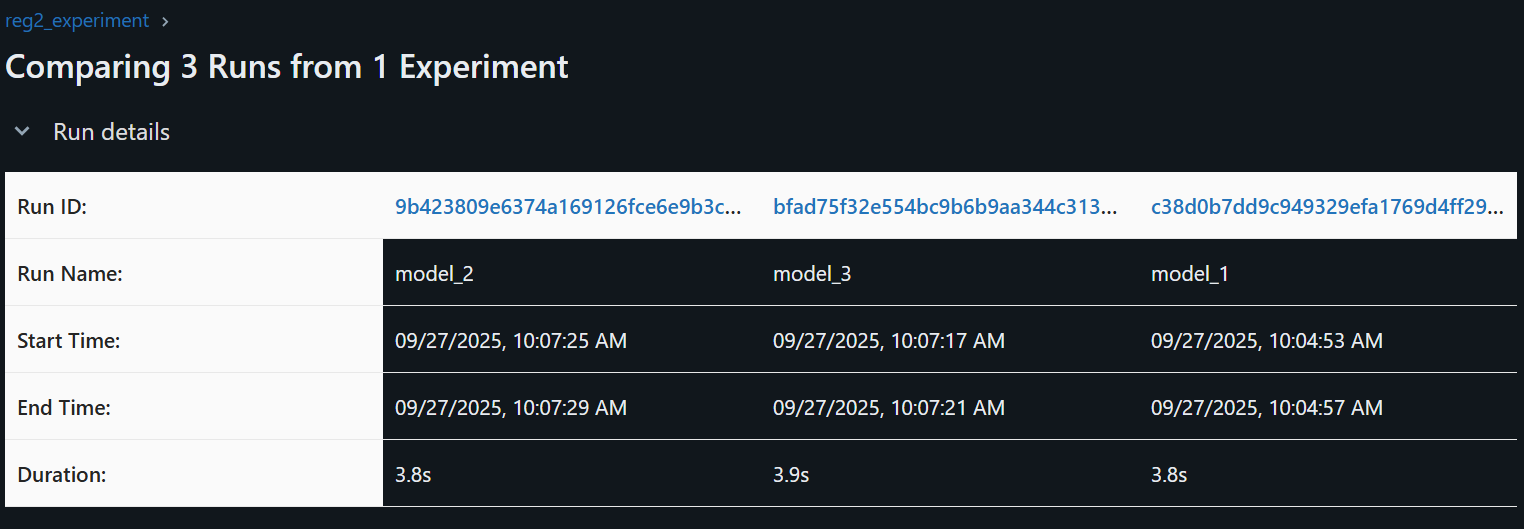



| Model   | Features Used |      MSE      |     R²      |
|---------|---------------|---------------|-------------|
| Model 1 | x1 only       | 1.2476        | -0.0198     |
| Model 2 | x2 only       | 1.3742        | -0.1233     |
| Model 3 | x1 + x2       | 0.0605        | 0.9506      |


##### Interpretation:

- Model 3 (using both x1 and x2) performs much better (lowest MSE, highest R²).

- Models using a single variable (x1 or x2) fit the data poorly (negative R² means worse than predicting the mean).